# Question 1

In [1]:
%matplotlib inline
import numpy as np
import scipy.linalg as linalg
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt



In [2]:
eta = 1
k =  0.1
m = 1.0
param = (eta/m)**2 - 4*k/m
print(param)

0.6


In [3]:
p0 = 2.
v0 = 0.01
t = np.linspace(0,10,100)
if param > 0:
    a = 0.5 * (-eta/m + math.sqrt(eta**2/m**2 - 4*k/m))
    b = 0.5 * (-eta/m - math.sqrt(eta**2/m**2 - 4*k/m))
    A = (p0*b - v0) / (b-a)
    B = (v0 - p0*a) / (b-a)
    p = A * np.exp(a * t) + B * np.exp(b * t)
elif param < 0:
    a = -0.5 * eta/m
    b = 0.5 * math.sqrt(4*k/m - eta**2/m**2)
    A = p0
    B = (v0 - p0*a) / b
    p = A * np.exp(a * t) * np.cos(b * t) + B * np.exp(a * t) * np.sin(b * t)
else:
    assert(False)

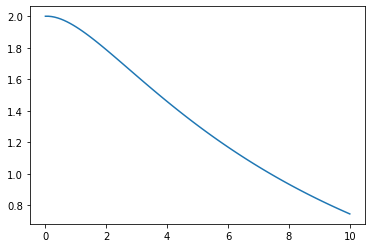

In [4]:
plt.plot(t,p);

# Question 2

In [5]:
MA = np.array([[0,1], [-k/m,-eta/m]])
x0 = np.array([p0,v0])
x = np.zeros((t.shape[0],2))
for i in range(t.shape[0]):
    x[i,:] = linalg.expm(MA*t[i])@x0  

In [6]:
linalg.expm(MA)

array([[ 0.96349596,  0.62180806],
       [-0.06218081,  0.3416879 ]])

In [7]:
MA

array([[ 0. ,  1. ],
       [-0.1, -1. ]])

In [8]:
np.exp(MA)

array([[1.        , 2.71828183],
       [0.90483742, 0.36787944]])

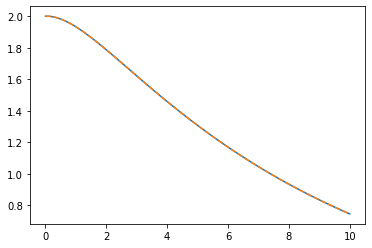

In [9]:
plt.plot(t,x[:,0],t,p,'--');

# Question 3

Euler method for ODE
\begin{equation}
    \frac{dx}{dt} = f(x,t) + u(t)
\end{equation}
is given by
\begin{equation}
    x(t + \Delta t) = x(t) + [f(x,t) + u(t)] \Delta t
\end{equation}


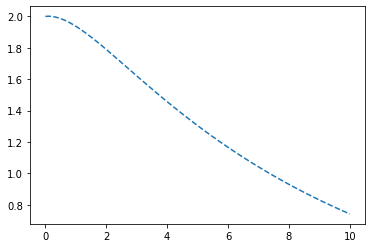

In [10]:
dt = t[1] - t[0]
x_euler = np.zeros((t.shape[0],2))
cx = x0
x_euler[0,:] = cx
for i in range(1,t.shape[0]):
    cx = cx + (MA @ cx) * dt
    x_euler[i,:] = cx

plt.plot(t,x_euler[:,0],'--');

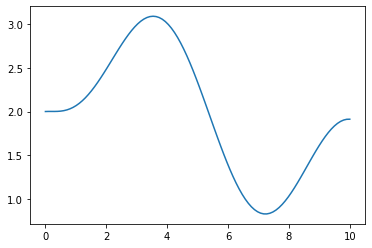

In [11]:
u = lambda t: math.sin(t)
Bu = np.array([0,1])

dt = t[1] - t[0]
x_euler = np.zeros((t.shape[0],2))
cx = x0
x_euler[0,:] = cx
for i in range(1,t.shape[0]):
    cx = cx + (MA @ cx + Bu * u(t[i])) * dt
    x_euler[i,:] = cx

plt.plot(t,x_euler[:,0]);

In [12]:
x0 = np.array([p0,v0])
x = np.zeros((t.shape[0],2))
for i in range(t.shape[0]):
    disc_u = np.zeros(x.shape[1])
    for j in range(x.shape[1]):
        val, err = integrate.quad(lambda s: (linalg.expm(MA*(t[i]-s))@Bu*u(s))[j],0,t[i])
        disc_u[j] = val
    x[i,:] = linalg.expm(MA*t[i])@x0 + disc_u

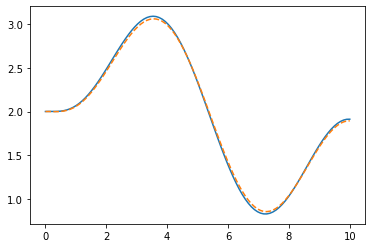

In [13]:
plt.plot(t,x_euler[:,0],t,x[:,0],'--');

In [17]:
def f(x,t):
    return MA@x + Bu*u(t)

In [18]:
x_odeint = integrate.odeint(f,x0,t)

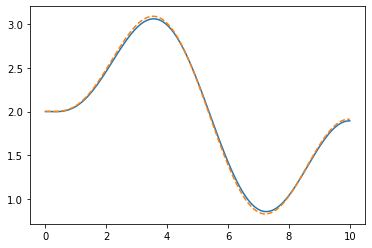

In [19]:
plt.plot(t,x_odeint[:,0],t,x_euler[:,0],'--');